# acsefunctions Documentation

## Overview

This notebook provides documentation for `acsefunctions`, which consists of 2 modules: taylors_series and bessel_group used for trigonometric and Bessel functions respectively, for use on scalar and numpy array objects. The trigonometric functions were created using Taylors series. The Bessel function was implemented based on Euler’s definition.

## Installation

To install `acsefunctions` in editable mode:

- Ensure that you have pip, git and conda installed
- Open a shell/terminal window and navigate to the directory you want this installed in
- Use the command `git clone https://github.com/ese-ada-lovelace-2024/mpm-assessment-1-esemsc-pbm24.git`
- Create an environment using `conda env create -f environment.yml`
- Activate the environment using `conda activate acsepackageenvironment`
- Use the command `pip install -e .` to install the package.

## Functions in the package with examples

### taylors_series module

`acsefunctions.taylors_series.trig_functions.cosh(x, terms=20)`

In [2]:
from acsefunctions.taylors_series.trig_functions import cosh

In [3]:
cosh(1)

array(1.54308063)

In [4]:
cosh(0)

array(1.)

`acsefunctions.taylors_series.trig_functions.sinh(x, terms=20)`

In [5]:
from acsefunctions.taylors_series.trig_functions import sinh

In [6]:
sinh(0)

array(0.)

In [7]:
sinh(90)

array(1.75617789e+29)

`acsefunctions.taylors_series.trig_functions.exp(x, terms=20)`

In [8]:
from acsefunctions.taylors_series.trig_functions import exp

In [9]:
exp(2.0)

array(7.3890561)

In [10]:
exp(10.0)

array(21950.37884943)

`acsefunctions.taylors_series.trig_functions.tanh(x, terms=20)`

In [11]:
from acsefunctions.taylors_series.trig_functions import tanh

In [12]:
tanh(1)

np.float64(0.7615941559557649)

In [13]:
tanh([1.0, 2.0, 3.0, 4.0, 5.0])

array([0.76159416, 0.96402758, 0.99505475, 0.9993293 , 0.9999092 ])

### bessel_group module

`acsefunctions.bessel_group.bessel_function.factorial(n)`

In [14]:
from acsefunctions.bessel_group.bessel_function import factorial

In [15]:
factorial(1)

array([1.])

factorial([0, 1, 2, 3, 4, 5])

`acsefunctions.bessel_group.bessel_function.gamma_function(z)`

In [16]:
from acsefunctions.bessel_group.bessel_function import gamma_function

In [17]:
gamma_function([1, 1.5, 2, 2.5, 3, 4])

array([1.05088491, 0.87972523, 0.99916542, 1.32925696, 1.99999916,
       6.00000083])

In [18]:
gamma_function(30.0)

array([8.84176199e+30])

`acsefunctions.bessel_group.bessel_function.bessel(alpha, x, terms=50)`

In [45]:
from acsefunctions.bessel_group.bessel_function import bessel

In [46]:
bessel(1,[0, 1, 2, 3, 4, 5])

array([ 0.        ,  0.4404682 ,  0.57755987,  0.34031109, -0.06437481,
       -0.32549533])

## Comparing Function Execution Times - acsefunctions vs NumPy & SciPy

In [43]:
#Importing required libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.special import jv as scipy_bessel

In [58]:
#Test values
x_values = np.linspace(-5, 5, 100)
truncation_levels = [5, 10, 15, 20, 25,30]
results = []

# Timing and Error Analysis
for terms in truncation_levels:
    approx_sinh = sinh(x_values, terms)
    approx_cosh = cosh(x_values, terms)
    approx_tanh = tanh(x_values, terms)
    approx_bessel = bessel(1,x_values, terms)

    exact_sinh = np.sinh(x_values)
    exact_cosh = np.cosh(x_values)
    exact_tanh = np.tanh(x_values)
    exact_bessel = scipy_bessel(x_values,terms)
    

    error_sinh = np.abs(approx_sinh - exact_sinh)
    error_cosh = np.abs(approx_cosh - exact_cosh)
    error_tanh = np.abs(approx_tanh - exact_tanh)
    error_bessel = np.abs(approx_bessel - exact_bessel)

    # Store results
    results.append({
        'Truncation Level': terms,
        'Max Error sinh': np.max(error_sinh),
        'Max Error cosh': np.max(error_cosh),
        'Max Error tanh': np.max(error_tanh),
        'Max Error bessel': np.max(error_bessel) })

In [59]:
results = pd.DataFrame(results)

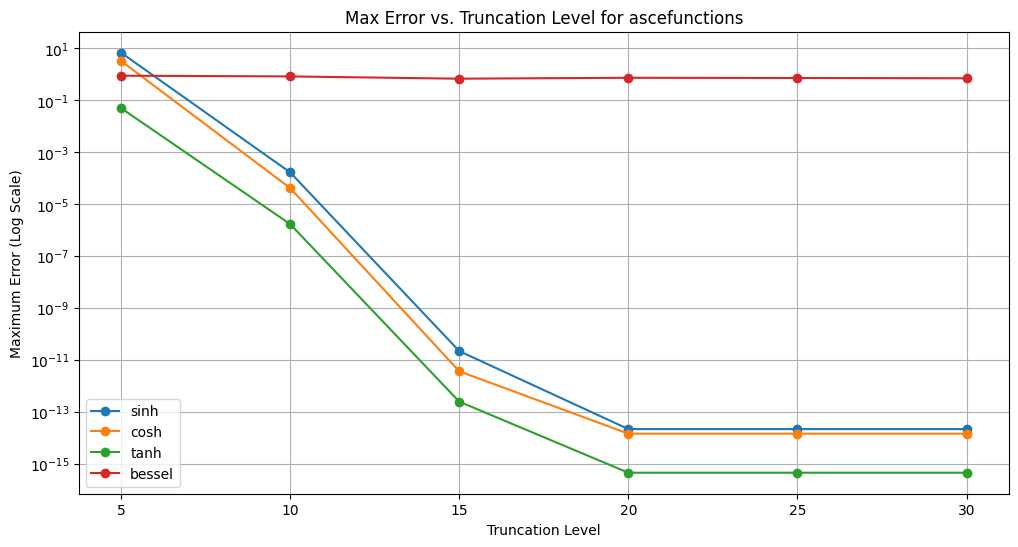

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(results['Truncation Level'], results['Max Error sinh'], label='sinh', marker='o')
plt.plot(results['Truncation Level'], results['Max Error cosh'], label='cosh', marker='o')
plt.plot(results['Truncation Level'], results['Max Error tanh'], label='tanh', marker='o')
plt.plot(results['Truncation Level'], results['Max Error bessel'], label='bessel', marker='o')
plt.yscale('log')  # Log scale for better visualization of errors
plt.xlabel('Truncation Level')
plt.ylabel('Maximum Error (Log Scale)')
plt.title('Max Error vs. Truncation Level for ascefunctions')
plt.legend()
plt.grid(True)
plt.show()

### Discussion of Results

**Taylor Series for Hyperbolic Functions (sinh, cosh, tanh)**
The Taylor series for hyperbolic functions are well-suited for calculating these functions due to their structure. The key feature of these series is that they are polynomial approximations, and polynomials tend to converge quickly near the point of expansion (which is typically x=0 for these series).

**Bessel Function: Euler's Integral Approximation**
The custom Bessel function is calculated using a series representation involving the Gamma function, which is itself calculated via Euler's integral definition. This series involves both factorials and the Gamma function, making it more complex than the hyperbolic functions. Compared to the hyperbolic functions, the error for the Bessel function decreases more gradually. This slow convergence is due to the more complex nature of the Bessel function, which involves higher-order terms and relies on factorial and gamma function computations.

####  How the Taylor Series Method Affects Accuracy:


**Near the Origin:**
The Taylor series expansions are centered at `x=0` and have very fast convergence for small values of `x` which explains why, by truncation level 10, the error is already quite small. For larger `x` the Taylor series still converges, but more terms are required to maintain the same accuracy. However, since hyperbolic functions grow exponentially, approximating them with polynomial terms quickly becomes very efficient as long as enough terms are included.

**Exponential Growth:**
Because sinh(x) and cosh(x) are defined in terms of exponential functions `e^x` and `e^-x`, their Taylor series approximations mimic this exponential growth. This means that the series can quickly approximate the true value for positive x once enough terms are included, which is why errors drop so rapidly by truncation level 10 and beyond.

#### How Euler's Integral Affects Accuracy:

**Integral Approximation**
Euler's integral is an accurate definition for the Gamma function, but numerical integration methods (like the trapezoidal rule introduced in the code) introduce some level of approximation error. This affects the accuracy of the Bessel function.

**Higher Terms and Factorials**
The series involves both factorials and powers of `x` and as these terms get larger, small inaccuracies in earlier terms compound. This is why the error for the Bessel function remains relatively large compared to the hyperbolic functions, which do not involve such complex term structures.

The Bessel series involves alternating terms and powers of `x/2` which behave differently from the polynomial terms in the Taylor series for hyperbolic functions. This difference in behavior explains why the Bessel function takes more terms to approximate accurately.


 **Key Takeaways**
 - As shown in the graph, the hyperbolic functions (sinh, cosh, tanh) converge more rapidly after about 20 terms, with errors stabilizing near zero. While adding more terms increases accuracy, it also increases computation time. After truncation level 20, the error remains around `10^-14` for sinh, cosh, and tanh. This indicates that any remaining error is mostly due to the limitations of floating-point precision in numerical computations rather than the accuracy of the series itself.
 
 So, for practical purposes, a truncation level of around 15 to 20 may provide the best balance between accuracy and speed.

 - Bessel function: While the error decreases as the truncation level increases, the convergence is slower, indicating that Bessel functions require either more terms or more sophisticated methods for higher accuracy. This is expected because Bessel functions have more complex behavior than hyperbolic functions.
 
 - Floating-point Precision: Beyond truncation level 20, the errors for hyperbolic functions reach the limits of floating-point precision, so further terms do not meaningfully reduce the error.

### Summary

In [60]:
pd.set_option('display.float_format', '{:.12e}'.format)

In [61]:
display(results)

,Truncation Level,Max Error sinh,Max Error cosh,Max Error tanh,Max Error bessel
0,5,6.827218514297e+00,3.278772929550e+00,5.003079751002e-02,8.884653787547e-01
1,10,1.666103206617e-04,4.142009157704e-05,1.687025287356e-06,8.331886202814e-01
2,15,2.162892087654e-11,3.595346242946e-12,2.431388423929e-13,6.815600864420e-01
3,20,2.131628207280e-14,1.421085471520e-14,4.440892098501e-16,7.397539032050e-01
4,25,2.131628207280e-14,1.421085471520e-14,4.440892098501e-16,7.266741833430e-01
5,30,2.131628207280e-14,1.421085471520e-14,4.440892098501e-16,7.069958620473e-01
